# K-Nearest Neighbour (KNN) Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm. It can be used for Regression as well as for Classification but mostly it is used for the Classification problems.



<img src="https://i.imgur.com/tyDhcjc.png" width="450" height="550">

## How does K-NN work?

The K-NN working can be explained on the basis of the below algorithm:

- Step-1: Select the number K of the neighbors
- Step-2: Calculate the Euclidean distance of K number of neighbors
- Step-3: Take the K nearest neighbors as per the calculated Euclidean distance or Manhattan distance.
- Step-4: Among these k neighbors, count the number of the data points in each category.
- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
- Step-6: Our model is ready.

Eg:- Suppose we have a new data point and we need to put it in the required category. Consider the below image:

<img src="https://i.imgur.com/krnhQWC.png" width="400" height="500">


- Firstly, we will choose the number of neighbors, so we will choose the k=5.
- Next, we will calculate the Euclidean distance between the data points. The Euclidean distance is the distance between two points, which we have already studied in geometry. It can be calculated as:


<img src="https://i.imgur.com/cxVt7jj.png?1" width="400" height="500">

Euclidean Distance between A and B = $ \sqrt{(X_2 - X_1)^2 + (Y_2 - Y_1)^2}$


- By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. Consider the below image.


<img src="https://i.imgur.com/pNw7rkU.png" width="400" height="500">

 we can see the 3 nearest neighbors are from category A, hence this new data point must belong to category A.

### Advantages of KNN Algorithm:
- It is simple to implement.
- It is robust to the noisy training data
- It can be more effective if the training data is large.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
- It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.


### Disadvantages of KNN Algorithm:
- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.
- The KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

### Python implementation of the KNN algorithm

#### Problem Statement:

One of the very famous classification problems in Machine Learning is the IRIS Flower classification problem.Iris is the family in the flower which contains several species such as the Iris setosa, Iris versicolor, Iris virginica, etc.

<b>In this tutorial you are going to Classify the three species of Iris family based on petal width, petal length, sepal length, and sepal width.</b>

###### Attribute Information:
   1. sepal length (in cm)
   2. sepal width (in cm)
   3. petal length (in cm)
   4. petal width (in cm)
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

### Load Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

### Data Acquisiton

In [2]:
data = pd.read_csv("./iris.csv")

In [3]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Printing Dimension of datasets
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (150, 5)
Number of rows in the dataset: 150
Number of columns in the dataset: 5


In [5]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)


Column Names: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


### Exploratory Data Analysis (EDA)

In [6]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 2-D Scatter plot.

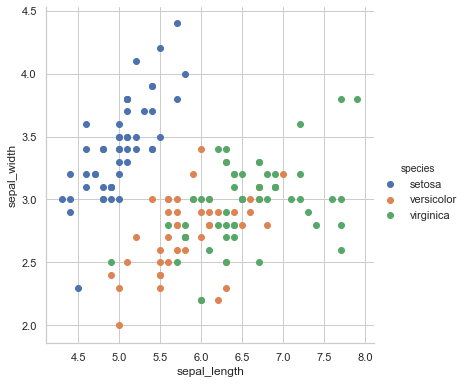

In [8]:
# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species", size=5.5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Similarly we can draw multiple 2-D scatter plots for each combination of features so total cobinations = 4C2 = 6.

Observation(s):

- Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
- Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#### Pairplot on the data

Pair plot makes high-level scatter plots to capture relationships between multiple variables within a dataframe.

Dis-advantages: 
- Can be used when number of features are high.
- Cannot visualize higher dimensional patterns in 3-D and 4-D. 
- Only possible to view 2D patterns.

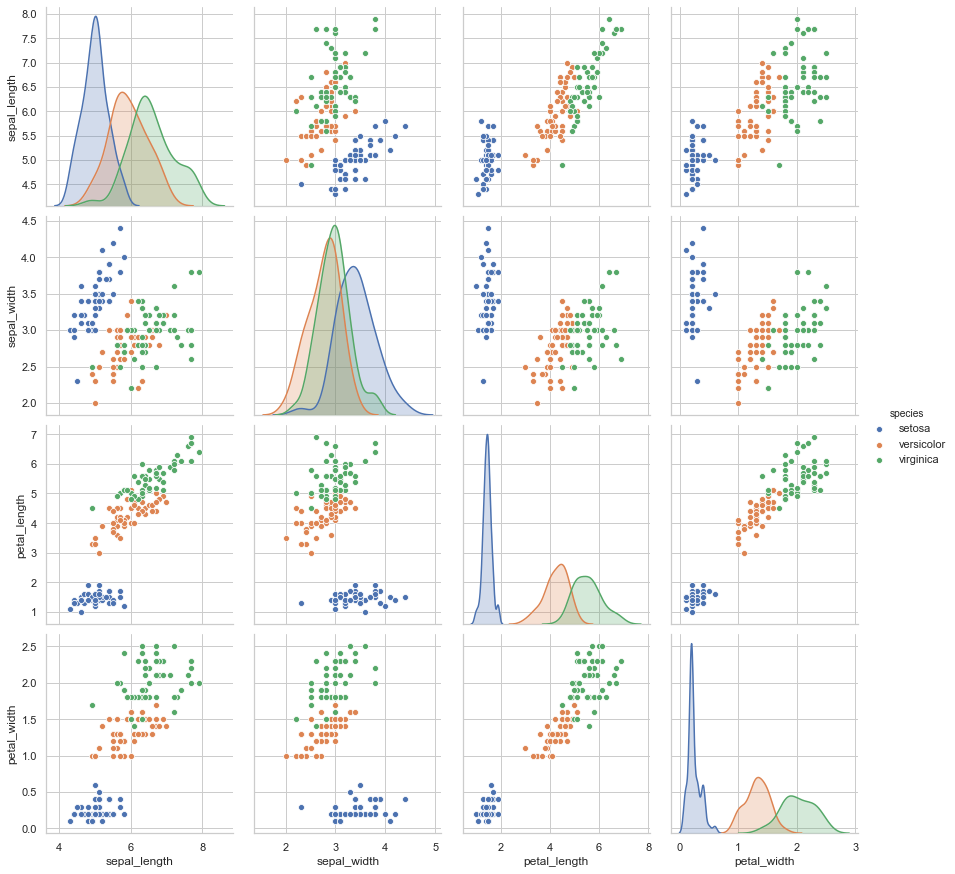

In [9]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="species", size=3);
plt.show()

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

#### Univariate Analysis using PDF
Let’s do some univariate ananlysis using PDF to find one of my 4 variable i.e Sepal length, Sepal width, Petal length, and Petal width is more useful to distinguish my flowers.

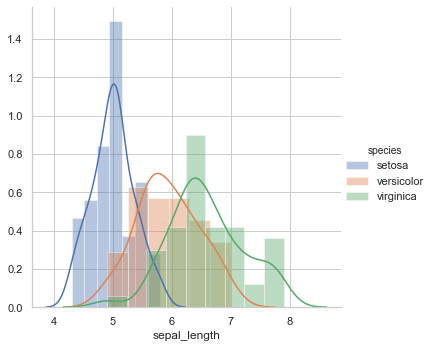

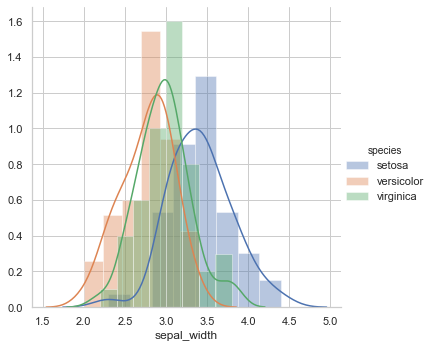

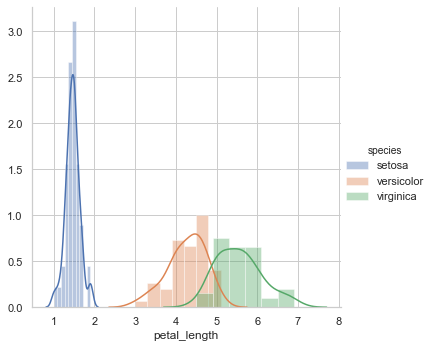

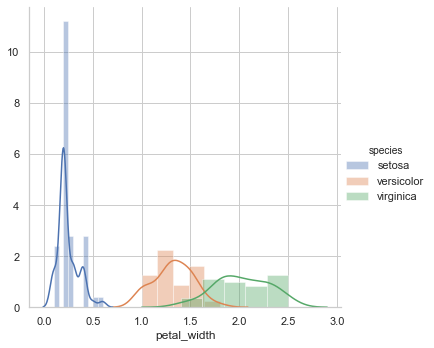

In [10]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="species", size=5).map(sns.distplot, name).add_legend()
plt.show()

Observation(s):

- For Sepal_width : we can see virginica and versicolor are fully overlapped.
- For Sepal_length : we can’t separate any class because all of them are overlapped. From the obsevations,Sapel length is worst than Patel length and Patel width.
- As we compare petal length and petal width then petal length the setosa are better separable than using patel eidth. There is overlap between vericolor and virginca

### boxplot and whiskers

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

<img src="https://i.imgur.com/RW88fi1.png?1" width="400" height="500">

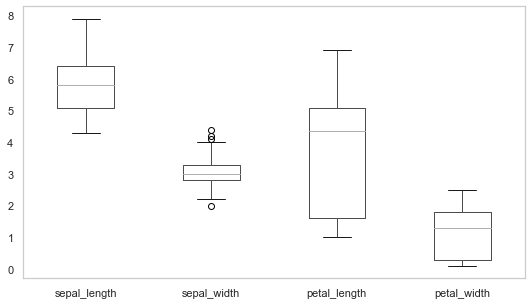

In [11]:
data.boxplot(column= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],figsize=(9,5),grid = False)

In [12]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [14]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
#data points for each class
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

As you can see after execution of this “iris[“species”].value_counts()” ,the data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50).

Text(0.5, 1.0, 'Species distribution')

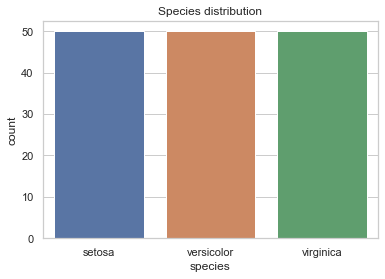

In [16]:
#Count plot for Species
sns.countplot('species',data = data)
plt.title("Species distribution")

###### Converting the species labels into numeric


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.


In [17]:
# # Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# data['species']= label_encoder.fit_transform(data['species']) 

In [18]:
#Check unique value of species
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
# Showing overview of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. 

In [20]:
#Constructing correlation Matrix
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


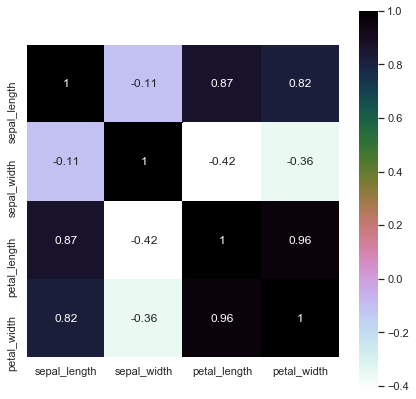

In [21]:
#heatmap 
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [22]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state = 1)

Here we divided the data into train and test. we design a model using the training data .predict the output for each set of features in test data.

In [23]:
#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species'] 

In [24]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (120, 4)
Dimension of train_y : (120,)
Dimension of test_x : (30, 4)
Dimension of test_y : (30,)


In [25]:
#Using KNN Classifier for model building 

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
# Predict Species for test data
pred = KNN.predict(test_x)
pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [27]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 100.0%


### Hyperparameter Tuning
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. 

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns.  These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem.

### GridSearchCV
In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [28]:
# Tunings Parameters without Grid Search

train_accuracy = []
test_accuracy = []

for k in range(1,16):                                 # K from 1 to 15
    KNN = KNeighborsClassifier(n_neighbors=k)         #KNN Classifier with K = k
    KNN.fit(train_x, train_y)
#######################################################################################
    train_pred = KNN.predict(train_x)                 #prediction on trian data
    train_score = accuracy_score(train_pred,train_y)  #Train accuracy
    train_accuracy.append(train_score)
    
#######################################################################################
    test_pred = KNN.predict(test_x)                   #prediction on test data
    test_score = accuracy_score(test_pred,test_y)     #test accuracy
    test_accuracy.append(test_score)  
    
#######################################################################################

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))


Best accuracy is 1.0 with K = 1


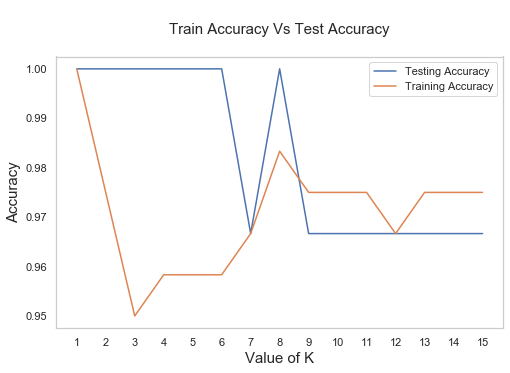

In [29]:
#Accuracy Plot
plt.figure(figsize=[8,5])
plt.plot(range(1,16), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,16), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,16))
plt.grid()
plt.show()

In [30]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,16,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
#KNN best estimator
knn_besthypr = grid_knn.best_estimator_
knn_besthypr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [32]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'euclidean', 'n_neighbors': 11}
Best score: 0.975


In [33]:
#Using best hyperparameter

knn = knn_besthypr.fit(train_x,train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 11 is 96.67%


In [35]:
#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = y_pred
test

,sepal_length,sepal_width,petal_length,petal_width,species,pred_species
0,5.8,4.0,1.2,0.2,setosa,setosa
1,5.1,2.5,3.0,1.1,versicolor,versicolor
2,6.6,3.0,4.4,1.4,versicolor,versicolor
3,5.4,3.9,1.3,0.4,setosa,setosa
4,7.9,3.8,6.4,2.0,virginica,virginica
5,6.3,3.3,4.7,1.6,versicolor,versicolor
6,6.9,3.1,5.1,2.3,virginica,virginica
7,5.1,3.8,1.9,0.4,setosa,setosa
8,4.7,3.2,1.6,0.2,setosa,setosa
9,6.9,3.2,5.7,2.3,virginica,virginica
